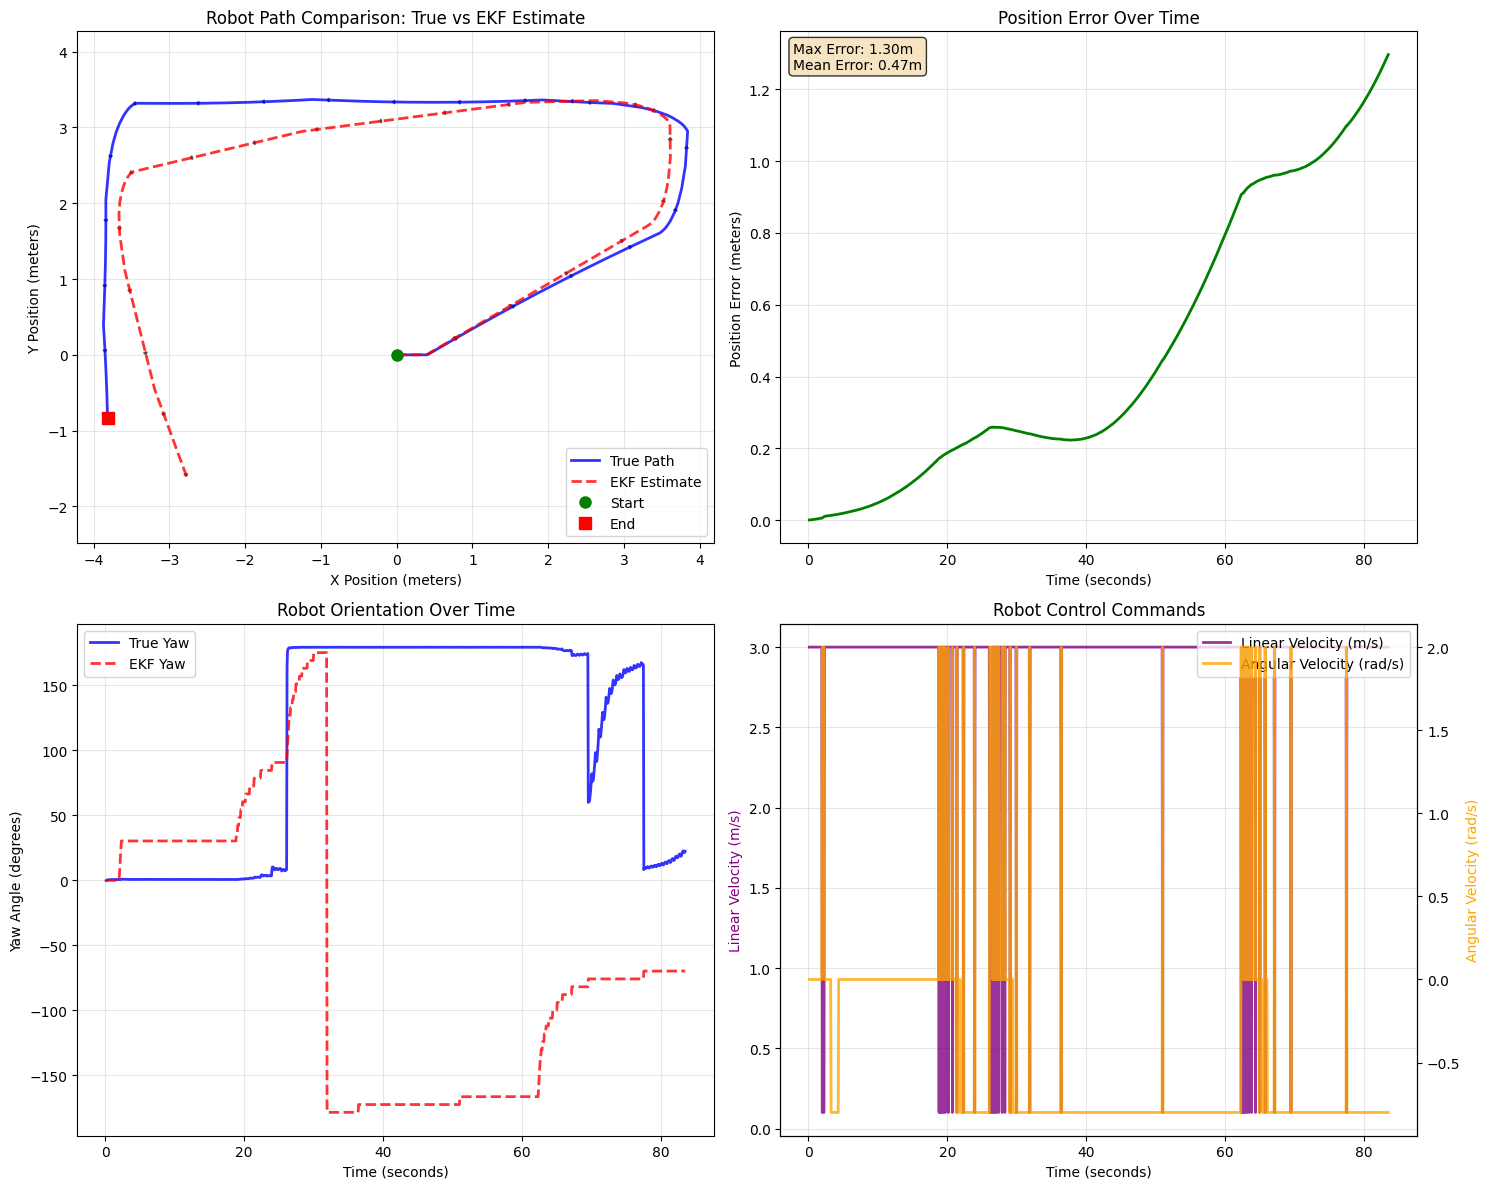


SLAM PERFORMANCE SUMMARY
Total simulation time: 83.5 seconds
Total distance traveled (true): 16.94 meters
Total distance traveled (EKF): 16.65 meters
Final position error: 1.30 meters
Maximum position error: 1.30 meters
Mean position error: 0.47 meters
RMS position error: 0.61 meters
Mean yaw error: 43.7 degrees
Max yaw error: 180.0 degrees


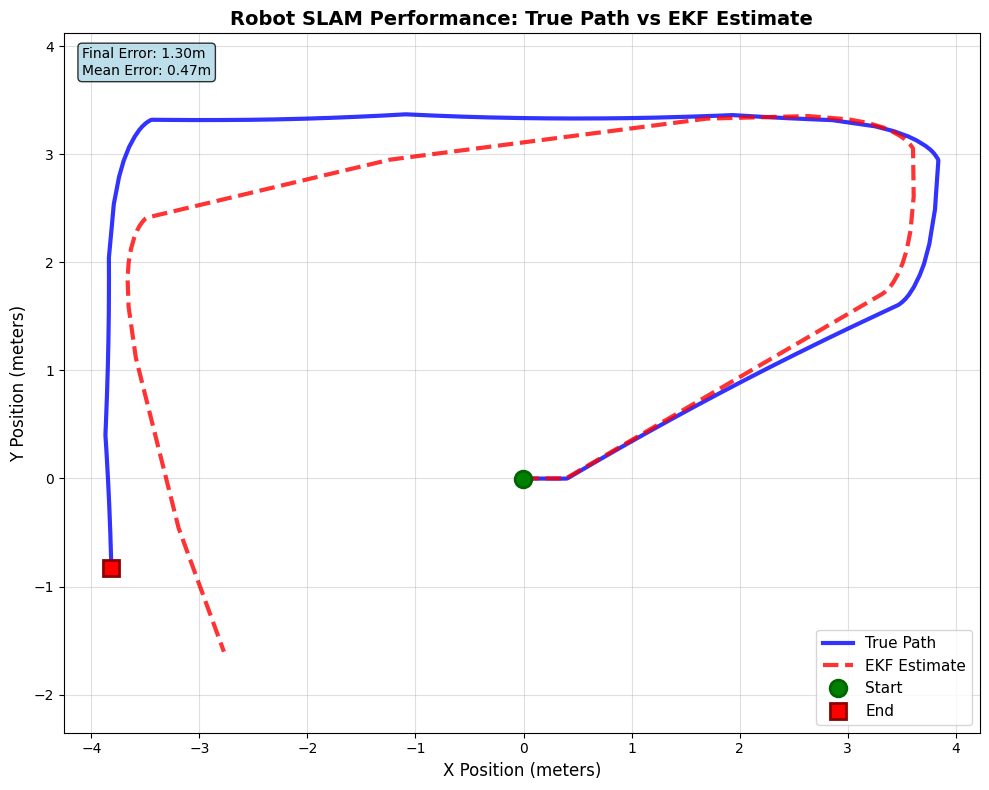


Plots saved as 'slam_complete_analysis.png' and 'slam_simple_comparison.png'


In [2]:


# import pandas as pd
# import matplotlib.pyplot as plt

# data = pd.read_csv('basic_slam_log.csv')

# plt.figure(figsize=(10, 8))
# plt.plot(data['true_x'], data['true_y'], 'b-', label='True Path')
# plt.plot(data['x'], data['y'], 'r--', label='EKF Estimate')
# plt.xlabel('X Position (left/right)')
# plt.ylabel('Y Position (forward/backward)')
# plt.legend()
# plt.grid(True)
# plt.axis('equal')
# plt.savefig('corrected_path_comparison.png')


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV data
data = pd.read_csv('basic_slam_log.csv')

# Create a comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Main path comparison plot
ax1.plot(data['true_x'], data['true_y'], 'b-', linewidth=2, label='True Path', alpha=0.8)
ax1.plot(data['x'], data['y'], 'r--', linewidth=2, label='EKF Estimate', alpha=0.8)
ax1.plot(data['true_x'].iloc[0], data['true_y'].iloc[0], 'go', markersize=8, label='Start')
ax1.plot(data['true_x'].iloc[-1], data['true_y'].iloc[-1], 'rs', markersize=8, label='End')
ax1.set_xlabel('X Position (meters)')
ax1.set_ylabel('Y Position (meters)')
ax1.set_title('Robot Path Comparison: True vs EKF Estimate')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Arrows to show direction every N points
N = max(1, len(data) // 20)  # 20 arrows
for i in range(0, len(data)-1, N):
    # True path arrows (blue)
    dx_true = data['true_x'].iloc[i+1] - data['true_x'].iloc[i]
    dy_true = data['true_y'].iloc[i+1] - data['true_y'].iloc[i]
    ax1.arrow(data['true_x'].iloc[i], data['true_y'].iloc[i], dx_true*0.5, dy_true*0.5,
              head_width=0.05, head_length=0.03, fc='blue', alpha=0.6)

    # EKF path arrows (red)
    dx_ekf = data['x'].iloc[i+1] - data['x'].iloc[i]
    dy_ekf = data['y'].iloc[i+1] - data['y'].iloc[i]
    ax1.arrow(data['x'].iloc[i], data['y'].iloc[i], dx_ekf*0.5, dy_ekf*0.5,
              head_width=0.05, head_length=0.03, fc='red', alpha=0.6)

# 2. Position error over time
position_error = np.sqrt((data['true_x'] - data['x'])**2 + (data['true_y'] - data['y'])**2)
ax2.plot(data['time'], position_error, 'g-', linewidth=2)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Position Error (meters)')
ax2.set_title('Position Error Over Time')
ax2.grid(True, alpha=0.3)
ax2.text(0.02, 0.98, f'Max Error: {position_error.max():.2f}m\nMean Error: {position_error.mean():.2f}m',
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Orientation comparison
ax3.plot(data['time'], np.degrees(data['true_theta']), 'b-', linewidth=2, label='True Yaw', alpha=0.8)
ax3.plot(data['time'], np.degrees(data['theta']), 'r--', linewidth=2, label='EKF Yaw', alpha=0.8)
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Yaw Angle (degrees)')
ax3.set_title('Robot Orientation Over Time')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Control inputs
ax4.plot(data['time'], data['v'], 'purple', linewidth=2, label='Linear Velocity (m/s)', alpha=0.8)
ax4_twin = ax4.twinx()
ax4_twin.plot(data['time'], data['omega'], 'orange', linewidth=2, label='Angular Velocity (rad/s)', alpha=0.8)
ax4.set_xlabel('Time (seconds)')
ax4.set_ylabel('Linear Velocity (m/s)', color='purple')
ax4_twin.set_ylabel('Angular Velocity (rad/s)', color='orange')
ax4.set_title('Robot Control Commands')
ax4.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig('slam_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("SLAM PERFORMANCE SUMMARY")
print("="*50)
print(f"Total simulation time: {data['time'].iloc[-1]:.1f} seconds")
print(f"Total distance traveled (true): {np.sum(np.sqrt(np.diff(data['true_x'])**2 + np.diff(data['true_y'])**2)):.2f} meters")
print(f"Total distance traveled (EKF): {np.sum(np.sqrt(np.diff(data['x'])**2 + np.diff(data['y'])**2)):.2f} meters")
print(f"Final position error: {position_error.iloc[-1]:.2f} meters")
print(f"Maximum position error: {position_error.max():.2f} meters")
print(f"Mean position error: {position_error.mean():.2f} meters")
print(f"RMS position error: {np.sqrt(np.mean(position_error**2)):.2f} meters")

# Yaw error (handle angle wrapping)
yaw_error = np.abs(data['true_theta'] - data['theta'])
yaw_error = np.minimum(yaw_error, 2*np.pi - yaw_error)  # Handle wrap-around
print(f"Mean yaw error: {np.degrees(yaw_error.mean()):.1f} degrees")
print(f"Max yaw error: {np.degrees(yaw_error.max()):.1f} degrees")

# A Simpler comparison plot
fig2, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(data['true_x'], data['true_y'], 'b-', linewidth=3, label='True Path', alpha=0.8)
ax.plot(data['x'], data['y'], 'r--', linewidth=3, label='EKF Estimate', alpha=0.8)
ax.plot(data['true_x'].iloc[0], data['true_y'].iloc[0], 'go', markersize=12, label='Start', markeredgewidth=2, markeredgecolor='darkgreen')
ax.plot(data['true_x'].iloc[-1], data['true_y'].iloc[-1], 'rs', markersize=12, label='End', markeredgewidth=2, markeredgecolor='darkred')

ax.set_xlabel('X Position (meters)', fontsize=12)
ax.set_ylabel('Y Position (meters)', fontsize=12)
ax.set_title('Robot SLAM Performance: True Path vs EKF Estimate', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.4)
ax.axis('equal')

# Add performance text
textstr = f'Final Error: {position_error.iloc[-1]:.2f}m\nMean Error: {position_error.mean():.2f}m'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig('slam_simple_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nPlots saved as 'slam_complete_analysis.png' and 'slam_simple_comparison.png'")